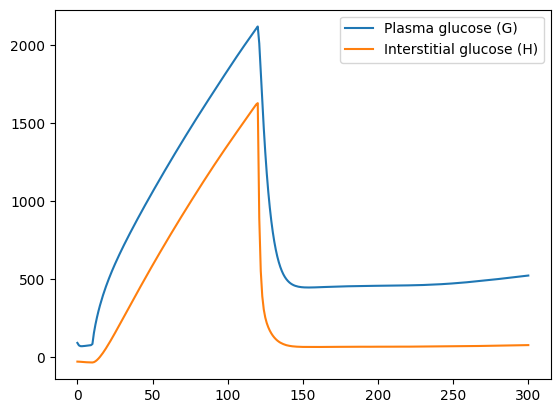

In [1]:
from model import GlucoseDynamicsSimulator
import numpy as np

sim = GlucoseDynamicsSimulator(weight=70, Gb=90, Ib=15)

y0 = sim.initial_conditions()

# define your inputs function
def inputs(t):
    # for example:
    Rameal_t = 0 if t<10 else 500   # meal appearance simplified
    I_t = 15
    E_t = 0.0 if t<120 else 0.5     # exercise from 120 min on
    return Rameal_t, I_t, E_t

from scipy.integrate import solve_ivp

sol = solve_ivp(
    lambda t,y: sim.odes(t,y,inputs),
    [0, 300],
    y0,
    t_eval=np.linspace(0,300,301)
)

# plot
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0], label="Plasma glucose (G)")
plt.plot(sol.t, sol.y[1], label="Interstitial glucose (H)")
plt.legend()
plt.show()
